<a href="https://colab.research.google.com/github/Ahmed-Magdi1/2DOF-Helicopter-LSTM/blob/main/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# Important libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [119]:
# Load input and output files
inputs = pd.read_csv('inputs.csv')  # Columns: V, I_pitch, I_yaw
outputs = pd.read_csv('outputs.csv')  # Columns: pitch_angle, yaw_angle

# Convert to NumPy arrays
X = inputs.values  # Shape: (samples, features)
Y = outputs.values  # Shape: (samples, targets)

## Normalize the Data

In [120]:
# Create scalers
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale inputs and outputs
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

## Reshape Data for LSTM

In [121]:
timesteps = 15  # Define the number of past time steps for each input sequence
features = X_scaled.shape[1]  # Number of input features (V, I_pitch, I_yaw)

## Create Sequences

In [122]:
# Create sequences for inputs and outputs
def create_sequences(data, labels, timesteps):
    X_seq, Y_seq = [], []
    for i in range(len(data) - timesteps):
        X_seq.append(data[i:i + timesteps])  # Input sequence
        Y_seq.append(labels[i + timesteps])  # Corresponding output
    return np.array(X_seq), np.array(Y_seq)

X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, timesteps)

## Split Data into Train, Validation, and Test Sets

In [123]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

## Define the LSTM Model

In [124]:
# Define the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(timesteps, features), return_sequences=True),
    LSTM(32, activation='tanh'),
    Dense(2, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 15, 64)              │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,890 (116.76 KB)

 Trainable params: 29,890 (116.76 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [125]:
# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1467 - mae: 0.2927 - val_loss: 0.0438 - val_mae: 0.1526
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mae: 0.1552 - val_loss: 0.0370 - val_mae: 0.1304
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0322 - mae: 0.1314 - val_loss: 0.0329 - val_mae: 0.1205
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0319 - mae: 0.1261 - val_loss: 0.0323 - val_mae: 0.1267
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0291 - mae: 0.1252 - val_loss: 0.0326 - val_mae: 0.1170
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0297 - mae: 0.1226 - val_loss: 0.0306 - val_mae: 0.1124
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0267 - mae: 0.1158 - val_loss: 0.0334 - val_mae: 0.1169
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0267 - mae: 0.1140 - val_loss: 0.0284 - val_mae: 0.1178
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - lo

## Evaluate the Model

In [126]:
loss, mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mae: 0.0583 
Test Loss: 0.012072937563061714, Test MAE: 0.05859809368848801


## Make Predictions

In [127]:
# Predict on test set
Y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual outputs
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
Y_actual = scaler_Y.inverse_transform(Y_test)

# Compare predictions and actual values
import pandas as pd
comparison = pd.DataFrame({
    'Predicted Pitch': Y_pred[:, 0],
    'Actual Pitch': Y_actual[:, 0],
    'Predicted Yaw': Y_pred[:, 1],
    'Actual Yaw': Y_actual[:, 1]
})
print(comparison.head(30))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
    Predicted Pitch  Actual Pitch  Predicted Yaw  Actual Yaw
0         -0.959365         -0.25       4.420635        5.75
1         64.081520         65.75       5.781978        3.75
2         -2.060831          0.00       2.396160        0.00
3         60.973953         59.75      -9.872765      -10.50
4         -0.883937         -0.50       4.159270        2.50
5         54.825748         57.00      -1.333535        0.25
6         64.999527         59.25      -6.665385       -9.25
7         40.672287         29.75      -3.252510       -6.75
8         55.284336         59.00      -5.879504      -13.25
9         59.147251         63.00       7.050489        3.00
10        55.299744         55.75      -4.572297        1.75
11        54.449287         57.25      -1.033762       -2.75
12        55.019222         57.00      -1.304811        0.75
13        16.510059         21.50       1.644669        1.00
14        56.543873         55.75      -2.09519

## Visualize Results

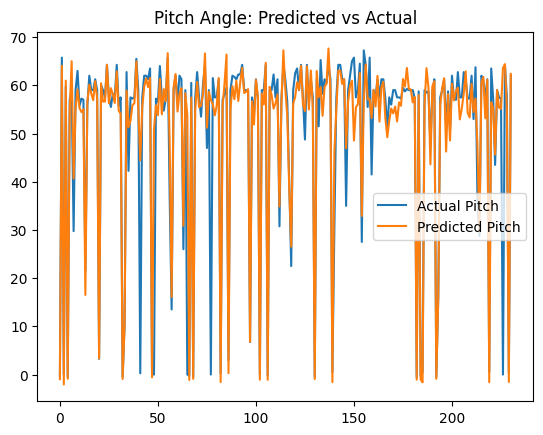

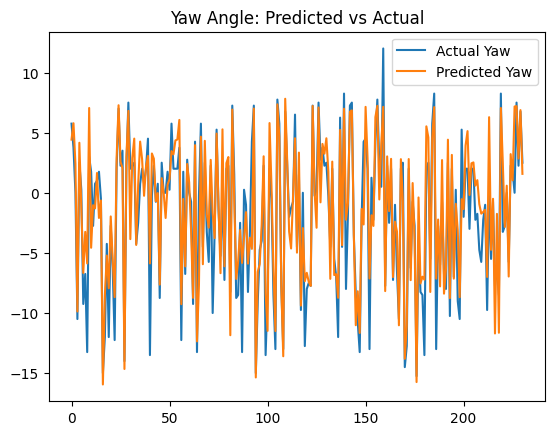

In [128]:
# Plot actual vs predicted

plt.figure()
plt.plot(Y_actual[:, 0], label='Actual Pitch')
plt.plot(Y_pred[:, 0], label='Predicted Pitch')
plt.legend()
plt.title('Pitch Angle: Predicted vs Actual')
plt.show()

plt.figure()
plt.plot(Y_actual[:, 1], label='Actual Yaw')
plt.plot(Y_pred[:, 1], label='Predicted Yaw')
plt.legend()
plt.title('Yaw Angle: Predicted vs Actual')
plt.show()

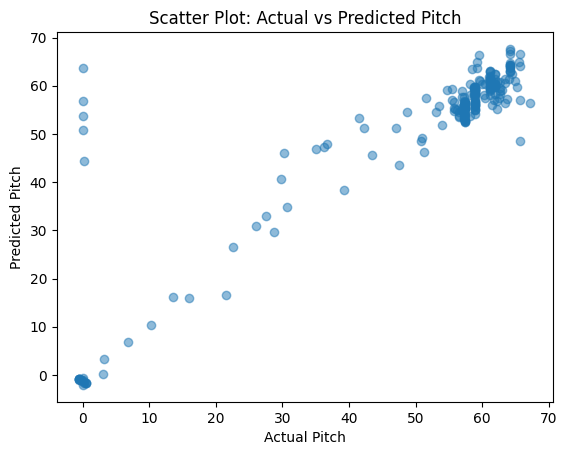

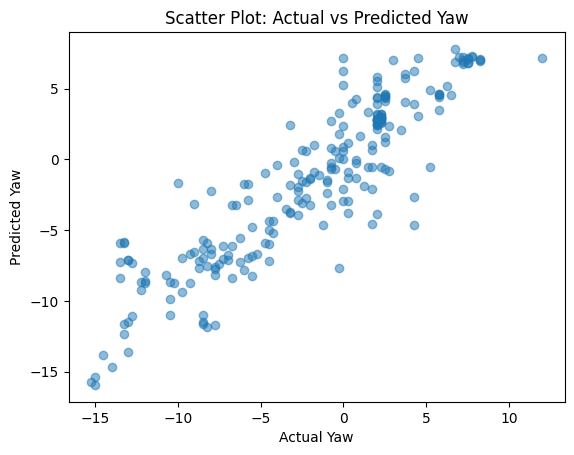

In [129]:
plt.scatter(Y_actual[:, 0], Y_pred[:, 0], alpha=0.5)
plt.xlabel('Actual Pitch')
plt.ylabel('Predicted Pitch')
plt.title('Scatter Plot: Actual vs Predicted Pitch')
plt.show()

plt.scatter(Y_actual[:, 1], Y_pred[:, 1], alpha=0.5)
plt.xlabel('Actual Yaw')
plt.ylabel('Predicted Yaw')
plt.title('Scatter Plot: Actual vs Predicted Yaw')
plt.show()

In [130]:
# Save the trained model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.save('2dof_helicopter_model.h5')  # Save the model

 ## Preparing a Single Input

In [138]:
# Define new input (1 timestep, 3 features: V, I_pitch, I_yaw)
new_inputs = [[12, 3, 7]]  # Example input

# Replicate input for required timesteps (e.g., 10 timesteps)
timesteps = 10  # Replace with your model's timestep size
new_inputs_sequence = np.array([new_inputs] * timesteps)  # Shape: (10, 3)

# Reshape to match LSTM input shape: (1, timesteps, features)
new_inputs_sequence = new_inputs_sequence.reshape((1, timesteps, len(new_inputs[0])))

# Scale the input sequence
new_inputs_scaled = scaler_X.transform(new_inputs_sequence[0])  # Scale each timestep
new_inputs_scaled = new_inputs_scaled.reshape((1, timesteps, len(new_inputs[0])))

## Predict Using the Model

In [139]:
# Predict
predicted_scaled = model.predict(new_inputs_scaled)

# Inverse transform the output to original scale
predicted = scaler_Y.inverse_transform(predicted_scaled)
print("Predicted Pitch and Yaw Angles:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Pitch and Yaw Angles: [[52.46844    0.3950624]]
